In [2]:
import iDEA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
import numpy as np
x = np.linspace(-20, 20, 200)
r = np.linspace(-30, 30, 200)
v_ext = -1/(1.5+abs(x))-1/(1.5+abs(x-2))
v_int = iDEA.interactions.softened_interaction(x)

In [4]:
s = iDEA.system.System(x, v_ext, v_int, electrons='ud') #suppose atom is He
a = iDEA.system.System(r, v_ext, v_int, electrons='d') # suppose atom is H
q = iDEA.system.System(r, v_ext, v_int, electrons='udu')
print(s)
print(a)
print(q)
print("number of electrons =", s.count)
print("number of electrons =", a.count)

iDEA.system.System: x = np.array([-20.000,...,20.000]), dx = 0.2010..., v_ext = np.array([-0.089,...,-0.098]), electrons = ud
iDEA.system.System: x = np.array([-30.000,...,30.000]), dx = 0.3015..., v_ext = np.array([-0.089,...,-0.098]), electrons = d
iDEA.system.System: x = np.array([-30.000,...,30.000]), dx = 0.3015..., v_ext = np.array([-0.089,...,-0.098]), electrons = udu
number of electrons = 2
number of electrons = 1


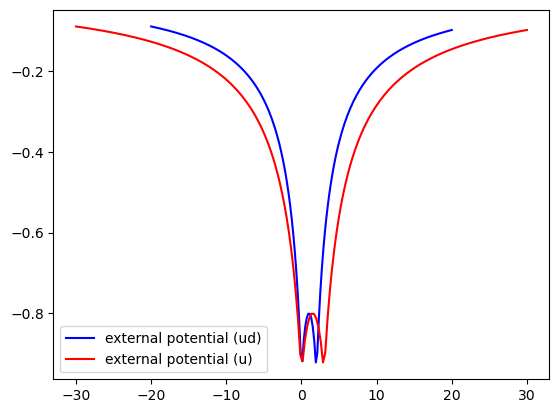

In [5]:
plt.plot(s.x, s.v_ext, 'b-', label='external potential (ud)')
plt.plot(a.x, a.v_ext, 'r-', label='external potential (u)')
plt.legend()
plt.show()

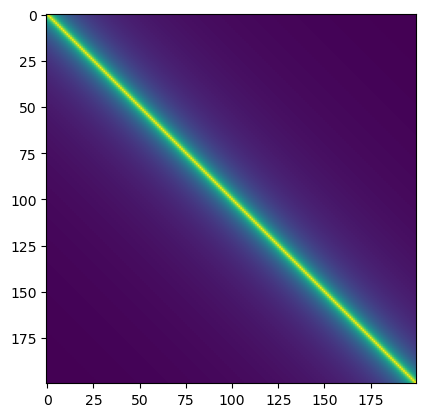

In [6]:
plt.imshow(v_int)
plt.show()

In [7]:
ground_state = iDEA.methods.interacting.solve(s, k=0)
#ground_state = iDEA.methods.interacting.solve(a, k=0)
print(ground_state.space.shape)
print(ground_state.spin.shape)
print(ground_state.full.shape)

iDEA.methods.interacting.solve: solving eigenproblem...
(200, 200)
(2, 2)
(200, 2, 200, 2)


In [8]:
#in this example i have chosen a 2 electron system (ud), so i want to to show a plot 
#of the spacial, spin and full form of the wavefn in 3D. 

0.23478186949455906


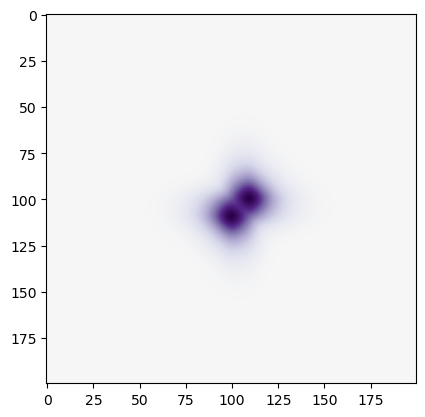

In [9]:
print(np.max(ground_state.space.real))
plt.imshow(abs(ground_state.space), cmap="PuOr", vmax=abs(np.max(ground_state.space.real)),
          vmin=-abs(np.max(ground_state.space.real)))
plt.show()

In [10]:
#Test that the wavefunction is antisymmetrised:

np.allclose(ground_state.full.real[80,0,50,0], -ground_state.full.real[50,0,80,0])
#first_state = iDEA.methods.interacting.solve(s, k=1)

True

In [11]:
#compute ground state density of this 2 electron system by calling the observables from
#the iDEA code inside the definition for the denisty and denisty matrix. 

In [12]:
n = iDEA.observables.density(s, state=ground_state)
p = iDEA.observables.density_matrix(s, state=ground_state)

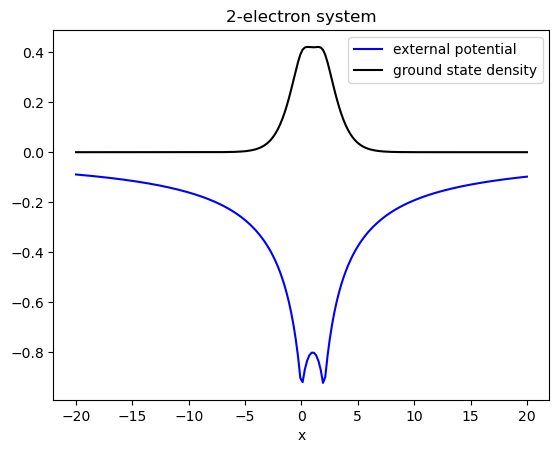

In [13]:
plt.plot(s.x, s.v_ext, 'b-', label="external potential")
plt.plot(s.x, n, 'k-', label="ground state density")
plt.legend()
plt.xlabel("x")
plt.title("2-electron system")
plt.show()

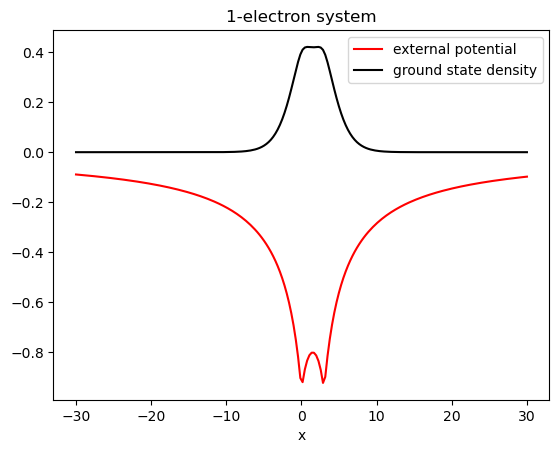

In [14]:
plt.plot(a.x, a.v_ext, 'r-', label="external potential")
plt.plot(a.x, n, 'k-', label="ground state density")
plt.legend()
plt.xlabel("x")
plt.title("1-electron system")
plt.show()

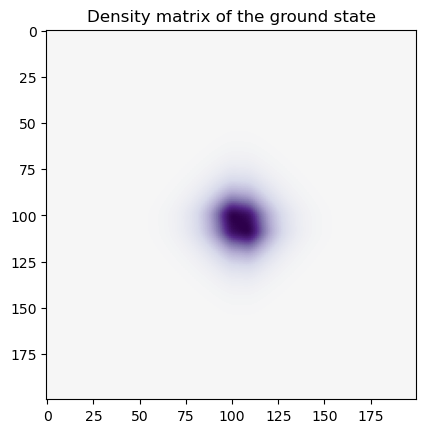

-0.9980434857030007


In [15]:
plt.imshow(p, cmap="PuOr", vmax=np.max(p), vmin=-np.max(p))
plt.title("Density matrix of the ground state")
plt.show()
print(ground_state.energy)

In [16]:
n = iDEA.observables.density(s, state=ground_state)
v_h = iDEA.observables.hartree_potential(s, n)
E_h = iDEA.observables.hartree_energy(s, n, v_h)

v_x = iDEA.observables.exchange_potential(s, p)
E_x = iDEA.observables.exchange_energy(s, p, v_x)

print("Exchange energy =", E_x)
print("Exchange potential =", v_x)

Exchange energy = -0.794792031355054
Exchange potential = [[-4.67121016e-13 -8.39994409e-13 -1.11692686e-12 ... -1.53185146e-13
  -9.82280739e-14 -4.52666333e-14]
 [-8.39994409e-13 -2.17877827e-12 -2.81593650e-12 ... -3.32477962e-13
  -2.13192143e-13 -9.82433639e-14]
 [-1.11692686e-12 -2.81593650e-12 -5.24955311e-12 ... -5.18658914e-13
  -3.32567216e-13 -1.53250120e-13]
 ...
 [-1.53185146e-13 -3.32477962e-13 -5.18658914e-13 ... -8.29199011e-11
  -4.44912891e-11 -1.76499688e-11]
 [-9.82280739e-14 -2.13192143e-13 -3.32567216e-13 ... -4.44912891e-11
  -3.44334758e-11 -1.32773469e-11]
 [-4.52666333e-14 -9.82433639e-14 -1.53250120e-13 ... -1.76499688e-11
  -1.32773469e-11 -7.38467513e-12]]


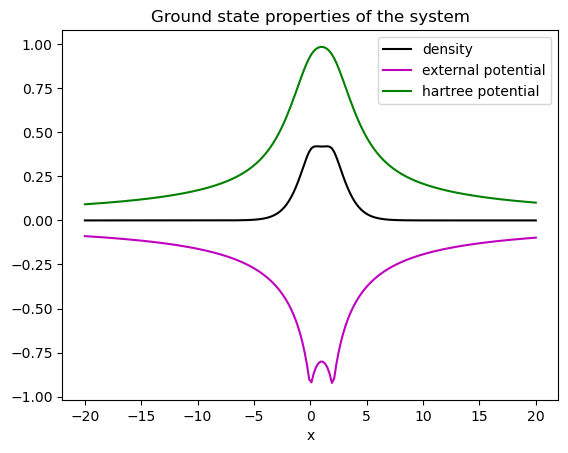

In [17]:
plt.plot(s.x, n, 'k-', label="density")
plt.plot(s.x, s.v_ext, 'm-', label="external potential")
plt.plot(s.x, v_h, 'g-', label="hartree potential")
plt.legend()
plt.xlabel("x")
plt.title("Ground state properties of the system")
plt.show()

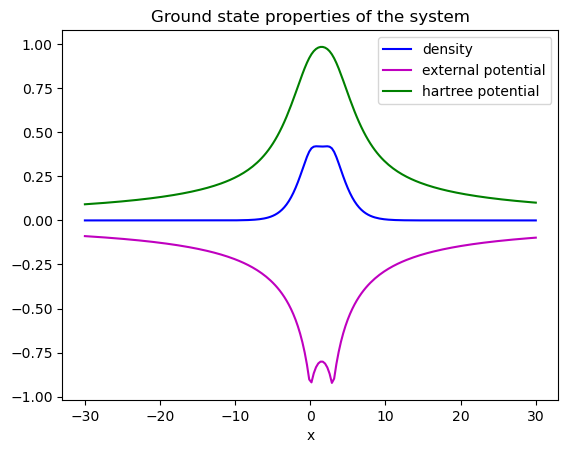

In [18]:
plt.plot(a.x, n, 'b-', label="density")
plt.plot(a.x, s.v_ext, 'm-', label="external potential")
plt.plot(a.x, v_h, 'g-', label="hartree potential")
plt.legend()
plt.xlabel("x")
plt.title("Ground state properties of the system")
plt.show()

In [27]:
t = np.linspace(0, 10, 100)
v_ptrb = np.zeros(shape=t.shape+x.shape)
for j, ti in enumerate(t):
    v_ptrb[j,:] = -0.1 * x * np.sin(0.5*ti)

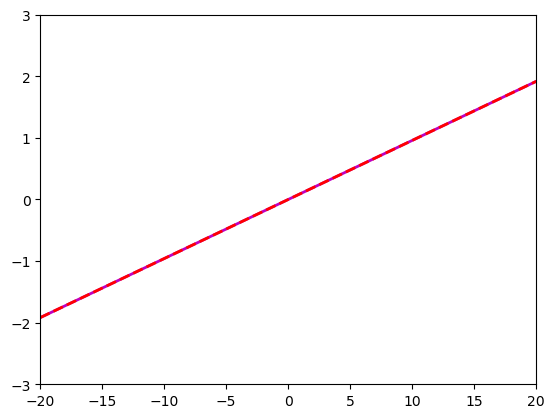

In [28]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig = plt.figure()
ax = plt.axes(xlim=(s.x[0], s.x[-1]), ylim=(-3.0, 3.0))
line1, = ax.plot([], [], lw=2, c='m')
line2, = ax.plot([], [], lw=2, c='r', ls='--')
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2
def animate(i):
    line1.set_data(s.x, v_ptrb[i,:])
    line2.set_data(s.x, v_ptrb[i,:])
    return line1, line2
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=50, blit=True)
HTML(anim.to_html5_video())

In [29]:
print(v_ptrb)
evolution = iDEA.methods.interacting.propagate(s, ground_state, v_ptrb, t)

[[ 0.          0.          0.         ... -0.         -0.
  -0.        ]
 [ 0.10096716  0.09995242  0.09893767 ... -0.09893767 -0.09995242
  -0.10096716]
 [ 0.20167684  0.19964994  0.19762303 ... -0.19762303 -0.19964994
  -0.20167684]
 ...
 [-1.96528102 -1.94552945 -1.92577788 ...  1.92577788  1.94552945
   1.96528102]
 [-1.94404365 -1.92450552 -1.9049674  ...  1.9049674   1.92450552
   1.94404365]
 [-1.91784855 -1.89857369 -1.87929883 ...  1.87929883  1.89857369
   1.91784855]]


iDEA.methods.interacting.propagate: propagating state: 100%|█| 100/100 [01:24<00


In [30]:
n = iDEA.observables.density(s, evolution=evolution)
z = iDEA.observables.density(s, ground_state)

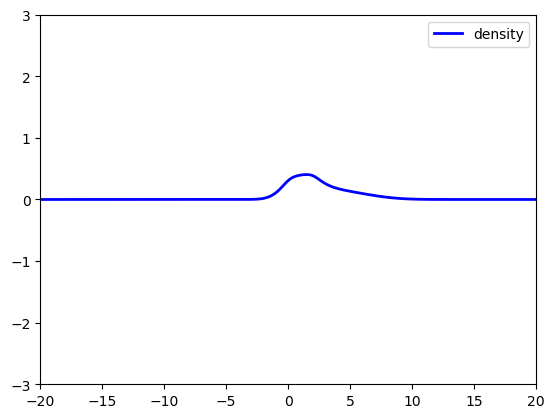

In [31]:
fig = plt.figure()
ax = plt.axes(xlim=(s.x[0], s.x[-1]), ylim=(-3.0, 3.0))
line1, = ax.plot([], [], lw=2, c='b', label="density")
def init():
    line1.set_data([], [])
    return line1,
def animate(i):
#line1.set_data(s.x, s.v_ext[:] + v_ptrb[i,:])
    line1.set_data(s.x, n[i,:])
    return line1,
plt.legend()
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=True)
HTML(anim.to_html5_video())

In [32]:
#REVERSE ENGINEERING TO FIND KS POT OF my SYSTEM
#help(iDEA.reverse_engineering.reverse)

In [33]:
x = np.linspace(-20, 20, 200)
v_ext = -1/(1.5+abs(x))-1/(1.5+abs(x-2))
v_int = iDEA.interactions.softened_interaction(x)
s = iDEA.system.System(x, v_ext, v_int, electrons='ud')
#ive not defined my other atom and have included only one term of my potential to 
#see if reverse engineeing works for my hardware. 

In [34]:
state = iDEA.methods.interacting.solve(s, k=0)
n = iDEA.observables.density(s, state)

iDEA.methods.interacting.solve: solving eigenproblem...


In [35]:
s_fictitious = iDEA.reverse_engineering.reverse(s, target_n=n, method=iDEA.methods.non_interacting)
state_fictitious = iDEA.methods.non_interacting.solve(s_fictitious, k=0)
 

iDEA.reverse_engineering.reverse: convergence = 1.0027e-12, tolerance = 1e-12
iDEA.methods.non_interacting.solve: convergence = 1.9503e-11, tolerance = 1e-10


In [36]:
v_ks = s_fictitious.v_ext #Kohn - Sham potential of the system to be of 
#the equivalent fictitious potential of our fictitious system
n_fictitious = iDEA.observables.density(s, state_fictitious)
v_h = iDEA.observables.hartree_potential(s_fictitious, n_fictitious)
v_xc = v_ks - s.v_ext - v_h 
v_ks = v_xc + s.v_ext + v_h

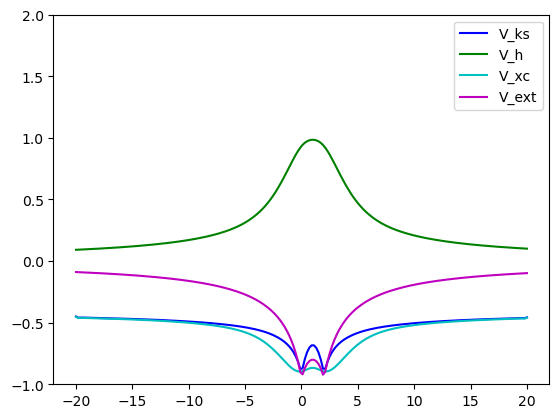

In [37]:
plt.plot(s_fictitious.x, v_ks, 'b-', label="V_ks")
plt.plot(s_fictitious.x, v_h, 'g-', label="V_h")
plt.plot(s_fictitious.x, v_xc, 'c-', label="V_xc")
plt.plot(s_fictitious.x, q.v_ext, 'm-', label="V_ext")
plt.legend()
plt.ylim([-1.0, 2.0])
plt.show()

The above code and calculation is iDEAs reverse engineering process used to determine the 
exact Kohn-Sham potential and xc potntial of this system. It achieves this by solving with a non interacting method, a fictitious system that has the same density as a system that is solved with an interacting method.

In [38]:
print(v_xc)

[-0.45230663 -0.46217853 -0.46113392 -0.46117192 -0.4617048  -0.46223525
 -0.46272098 -0.46320102 -0.46369418 -0.46420152 -0.4647205  -0.4652501
 -0.4657906  -0.46634262 -0.46690669 -0.46748323 -0.46807265 -0.46867537
 -0.46929186 -0.46992258 -0.47056806 -0.47122881 -0.47190541 -0.47259843
 -0.47330849 -0.47403622 -0.47478232 -0.47554749 -0.47633249 -0.47713811
 -0.47796519 -0.47881461 -0.47968732 -0.4805843  -0.48150661 -0.48245536
 -0.48343174 -0.48443701 -0.48547252 -0.4865397  -0.48764008 -0.4887753
 -0.48994712 -0.49115741 -0.49240822 -0.49370173 -0.49504029 -0.49642645
 -0.49786298 -0.49935289 -0.50089944 -0.50250621 -0.50417709 -0.50591638
 -0.50772877 -0.50961944 -0.51159414 -0.51365919 -0.51582163 -0.5180893
 -0.52047091 -0.52297621 -0.52561611 -0.52840284 -0.53135012 -0.5344734
 -0.53779004 -0.54131957 -0.54508402 -0.54910815 -0.55341981 -0.55805029
 -0.56303463 -0.56841199 -0.57422596 -0.58052477 -0.58736152 -0.59479409
 -0.60288498 -0.61170072 -0.62131084 -0.63178628 -0.643

In [39]:
import scipy.special as spspec
import numpy as np
x = np.linspace(-20, 20, 200)
v_ext = -1/(1.5+abs(x))-1/(1.5+abs(x-3))
v_int = iDEA.interactions.softened_interaction(x)
electrons = 'ud'
s = iDEA.system.System(x, v_ext, v_int, electrons)

In [55]:
t = np.linspace(0, 10, 200)
v_ptrb = np.zeros(shape=t.shape+x.shape)
for j, ti in enumerate(t):
    v_ptrb[j,:] = -0.1 * x * 0.5*(spspec.erf(ti - 1.0) + 2.0)

In [56]:
state = iDEA.methods.interacting.solve(s, k=0)
target_n = iDEA.observables.density(s, state=state)
s_fictitious = iDEA.reverse_engineering.reverse(s, target_n, method=iDEA.methods.non_interacting)
state_fictitious = iDEA.methods.non_interacting.solve(s_fictitious)

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.reverse_engineering.reverse: convergence = 1.1474e-12, tolerance = 1e-12
iDEA.methods.non_interacting.solve: convergence = 3.645e-11, tolerance = 1e-10


In [57]:
evolution = iDEA.methods.interacting.propagate(s, state, v_ptrb, t)
target_n = iDEA.observables.density(s, evolution=evolution)
evolution_fictitious, error = iDEA.reverse_engineering.reverse_propagation(s_fictitious, state_fictitious, target_n, iDEA.methods.non_interacting, v_ptrb, t)
evolution_fictitious = iDEA.methods.non_interacting.propagate(s_fictitious, state_fictitious, evolution_fictitious.v_ptrb, t)

iDEA.methods.interacting.propagate: propagating state: 100%|█| 200/200 [01:25<00
iDEA.reverse_engineering.reverse_propagation: reversing propagation: 100%|█| 200
iDEA.methods.non_interacting.propagate: propagating state: 100%|█| 200/200 [06:5


In [58]:
for ti in range( len(t) ):
    evolution_fictitious.v_ptrb[ti,:] -= evolution_fictitious.v_ptrb[ti,int(0.5*len(x))]
    
n = iDEA.observables.density(s, evolution=evolution_fictitious)
v_ext = iDEA.observables.external_potential(s)
v_h = iDEA.observables.hartree_potential(s, n)

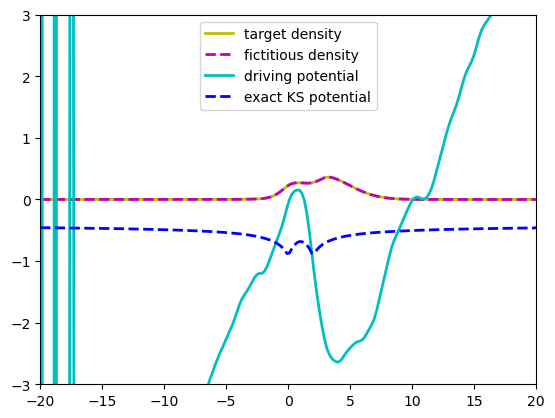

In [59]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig = plt.figure()
ax = plt.axes(xlim=(s.x[0], s.x[-1]), ylim=(-3.0, 3.0))
line1, = ax.plot([], [], lw=2, c="y", label="target density")
line2, = ax.plot([], [], lw=2, c="m", ls="--", label="fictitious density")
line3, = ax.plot([], [], lw=2, c="c", label="driving potential")
line4, = ax.plot([], [], lw=2, c="b", ls="--", label="exact KS potential")
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return line1, line2, line3, line4
def animate(i):
    line1.set_data(s.x, n[i,:])
    line2.set_data(s.x, target_n[i,:])
    line3.set_data(s.x, evolution_fictitious.v_ptrb[i,:])
    line4.set_data(s.x, v_ks)
    return line1, line2, line3, line4
plt.legend()
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=True)
HTML(anim.to_html5_video())

The above is a reverse engineering which determines the TD potential required in a TD fictitious system in order to obtain a target density.

In [60]:
#Reverse Engineering time-dependant potential using Hartree-Fock method (nonlocal potentials)

In [61]:
state = iDEA.methods.hartree_fock.solve(s, k=0)
target_n = iDEA.observables.density(s, state=state)
s_fictitious = iDEA.reverse_engineering.reverse(s, target_n, method=iDEA.methods.hartree_fock)
state_fictitious = iDEA.methods.hartree_fock.solve(s_fictitious)

iDEA.methods.hartree_fock.solve: convergence = 7.9468e-11, tolerance = 1e-10
iDEA.reverse_engineering.reverse: convergence = 1.0, tolerance = 1e-12
iDEA.methods.hartree_fock.solve: convergence = 7.9468e-11, tolerance = 1e-10


evolution = iDEA.methods.hartree_fock.propagate(s, state, v_ptrb, t)
target_n = iDEA.observables.density(s, evolution=evolution)
evolution_fictitious, error = iDEA.reverse_engineering.reverse_propagation(s_fictitious, state_fictitious, target_n, iDEA.methods.hartree_fock, v_ptrb, t)
evolution_fictitious = iDEA.methods.hartree_fock.propagate(s_fictitious, state_fictitious, evolution_fictitious.v_ptrb, t)

In [63]:
for ti in range( len(t) ):
    evolution_fictitious.v_ptrb[ti,:] -= evolution_fictitious.v_ptrb[ti,int(0.5*len(x))]
    
n = iDEA.observables.density(s, evolution=evolution_fictitious)
v_ext = iDEA.observables.external_potential(s)
v_h = iDEA.observables.hartree_potential(s, n)
v_h = iDEA.observables.hartree_potential(s_fictitious, n_fictitious)

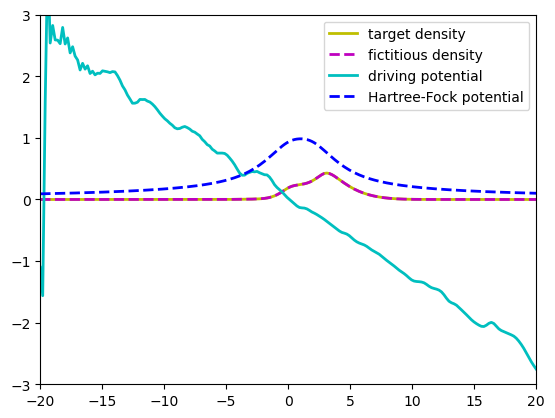

In [64]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig = plt.figure()
ax = plt.axes(xlim=(s.x[0], s.x[-1]), ylim=(-3.0, 3.0))
line1, = ax.plot([], [], lw=2, c="y", label="target density")
line2, = ax.plot([], [], lw=2, c="m", ls="--", label="fictitious density")
line3, = ax.plot([], [], lw=2, c="c", label="driving potential")
line4, = ax.plot([], [], lw=2, c="b", ls="--", label="Hartree-Fock potential")
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    return line1, line2, line3, line4
def animate(i):
    line1.set_data(s.x, n[i,:])
    line2.set_data(s.x, target_n[i,:])
    line3.set_data(s.x, evolution_fictitious.v_ptrb[i,:])
    #line4.set_data(s.x, v_ptrb[i,:])
    line4.set_data(s.x, v_h)
    return line1, line2, line3, line4
plt.legend()
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=True)
HTML(anim.to_html5_video())

Reverse engineering to find TD Potential in a fictitious evolving system using the Hartree-Fock method

In [65]:
print("Hartree potential =", v_h)

Hartree potential = [0.09156125 0.09241805 0.09329116 0.09418106 0.09508825 0.09601323
 0.09695654 0.09791874 0.0989004  0.09990213 0.10092455 0.10196833
 0.10303413 0.10412268 0.10523471 0.10637102 0.1075324  0.10871971
 0.10993383 0.1111757  0.1124463  0.11374664 0.11507779 0.11644088
 0.11783709 0.11926766 0.1207339  0.12223717 0.12377892 0.12536068
 0.12698405 0.12865072 0.13036249 0.13212124 0.13392898 0.13578783
 0.13770004 0.13966799 0.14169422 0.14378142 0.14593246 0.1481504
 0.15043849 0.15280023 0.15523934 0.15775981 0.16036594 0.16306232
 0.1658539  0.16874602 0.17174444 0.1748554  0.17808562 0.18144245
 0.18493381 0.1885684  0.19235564 0.19630588 0.20043044 0.20474172
 0.20925339 0.21398047 0.21893956 0.22414898 0.22962903 0.2354022
 0.24149344 0.24793048 0.25474412 0.26196865 0.26964216 0.27780702
 0.28651028 0.29580414 0.30574634 0.31640064 0.3278371  0.34013239
 0.35336986 0.36763939 0.38303697 0.39966375 0.41762452 0.4370255
 0.45797097 0.4805588  0.50487437 0.53098272 

In [66]:
v_xc = v_ks - s.v_ext - v_h 
print("Exchange correlation potential = ", v_xc)

Exchange correlation potential =  [-0.45404349 -0.46394487 -0.4629305  -0.46299951 -0.46356421 -0.46412733
 -0.46464659 -0.46516106 -0.46568959 -0.46623326 -0.46678958 -0.46735755
 -0.46793749 -0.46853008 -0.46913588 -0.46975535 -0.47038896 -0.47103717
 -0.47170049 -0.47237947 -0.47307466 -0.47378666 -0.47451608 -0.47526358
 -0.47602984 -0.47681558 -0.47762155 -0.47844855 -0.47929743 -0.48016905
 -0.48106437 -0.48198436 -0.48293008 -0.48390262 -0.48490316 -0.48593295
 -0.4869933  -0.48808563 -0.48921142 -0.49037227 -0.49156989 -0.4928061
 -0.49408285 -0.49540224 -0.49676652 -0.4981781  -0.4996396  -0.50115384
 -0.50272389 -0.50435304 -0.50604492 -0.50780344 -0.50963289 -0.51153798
 -0.51352384 -0.51559616 -0.51776118 -0.52002579 -0.52239765 -0.52488524
 -0.527498   -0.53024645 -0.53314236 -0.53619887 -0.53943071 -0.54285443
 -0.54648859 -0.55035406 -0.5544743  -0.55887567 -0.5635878  -0.5686439
 -0.57408119 -0.57994122 -0.58627022 -0.59311941 -0.60054517 -0.60860912
 -0.61737791 -0.626

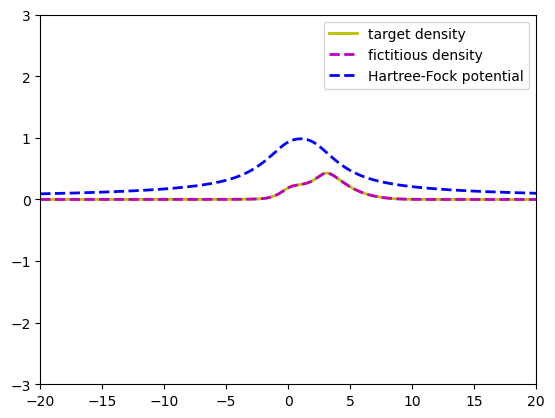

In [67]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
fig = plt.figure()
ax = plt.axes(xlim=(s.x[0], s.x[-1]), ylim=(-3.0, 3.0))
line1, = ax.plot([], [], lw=2, c="y", label="target density")
line2, = ax.plot([], [], lw=2, c="m", ls="--", label="fictitious density")
line4, = ax.plot([], [], lw=2, c="b", ls="--", label="Hartree-Fock potential")
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line4.set_data([], [])
    return line1, line2, line3, line4
def animate(i):
    line1.set_data(s.x, n[i,:])
    line2.set_data(s.x, target_n[i,:])
    #line4.set_data(s.x, v_ptrb[i,:])
    line4.set_data(s.x, v_h)
    return line1, line2, line3, line4
plt.legend()
anim = FuncAnimation(fig, animate, init_func=init, frames=100, interval=10, blit=True)
HTML(anim.to_html5_video())

In [68]:
state = iDEA.methods.interacting.solve(s, k=0)
target_n = iDEA.observables.density(s, state=state)
s_fictitious = iDEA.reverse_engineering.reverse(s, target_n, method=iDEA.methods.lda)
state_fictitious = iDEA.methods.lda.solve(s_fictitious)

evolution = iDEA.methods.interacting.propagate(s, state, v_ptrb, t)
target_n = iDEA.observables.density(s, evolution=evolution)
evolution_fictitious, error = iDEA.reverse_engineering.reverse_propagation(s_fictitious, state_fictitious, target_n, iDEA.methods.lda, v_ptrb, t)
evolution_fictitious = iDEA.methods.lda.propagate(s_fictitious, state_fictitious, evolution_fictitious.v_ptrb, t)

iDEA.methods.interacting.solve: solving eigenproblem...


KeyboardInterrupt: 

In [ ]:
for ti in range( len(t) ):
    evolution_fictitious.v_ptrb[ti,:] -= evolution_fictitious.v_ptrb[ti,int(0.5*len(x))]
    
n = iDEA.observables.density(s, evolution=evolution_fictitious)
v_ext = iDEA.observables.external_potential(s)
v_h = iDEA.observables.hartree_potential(s, n)
v_h = iDEA.observables.hartree_potential(s_fictitious, n_fictitious)
print("external_potential =", v_ext)